In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Interpolacija

Zamislimo da nam je poznata neke informacije o funkciji $f$ te ju želimo zamijeniti s nekom drugom funkcijom $\varphi$ na skupu $X\subseteq\mathbb{R}$ na osnovu tih informacija, tako da se $f$ i $\varphi$ što više podudaraju. 
Skup X ćemo gledati kao interval $[a,b]$ ili kao diskretan skup tocaka.

<b>Interpolacija</b> je zahtijev da se funkcije $f$ i $varphi$ podudaraju na nekom konačnom skupu točaka. Te točke zovemo <b>čvorovi</b> interpolacije. U najjednostavnijem obliku interpolacije tražimo da se $f$ i $\varphi$ podudaraju na konačnom broju točaka $x_0,x_1,...,x_n$

Najjednostavniji oblik je zasigurno interpolacija polinomima. Promatramo funkciju $f$ na intervalu $[a,b]$ te točke $a ≤ x_0 < x_1 < · · · < x_n ≤ b$ te su poznate vrijednosti $f(x_k) = f_k ,  k = 0,...,n$. Koristan će nam biti slijedeći teorem:

<b>Egzistencija i jedinstvenost interpolacionog polinoma</b><br>
Neka je $n \in \mathbb{N}$. Za zadane točke $(x_k, f_k), k = 0, . . ., n$, gdje je
$x_i \neq x_j$ za $i \neq j$, postoji jedinstveni (interpolacioni) polinom stupnja najviše $n$

$$\varphi(x) := p_n(x) = a_0 + a_1x + · · · + a_nx^n$$

za koji vrijedi
$p_n(x_k) = f_k, k = 0, . . ., n$

<br>
Za izračunavanje vrijednosti polinoma u točki koristi se Hornerov algoritam koji računa polinom iz:<br>
    $$f(x) = (((a_nx + a_{n−1}) x + a_{n−2}) x + . . . + a_1) x + a_0$$

In [19]:
def horner(a, x):
    #a je polje koeficijenata, x vrijednost
    n = len(a)
    s = a[0]    #koeficijent uz x^n
    for i in range(1, n):
        s = s*x + a[i]
    return s

Da se vratimo na interpolaciju, najlakši način za pronaći ploniom stupnja $n$ koji prolazi kroz zadanih $n+1$ točaka jest rješavanjem pripadnog sustava jednadžbi:

Neka su zadane točke $(x_0,f_0),...,(x_n,f_n)$, tražimo polinom oblika $\varphi(x) = a_0 + a_1x + ... + a_nx$

$$\varphi(x_0) = f_0$$
$$...$$
$$\varphi(x_n) = f_n$$
Tu će nam poslužiti numpy funkcija <b>np.linalg.solve</b> koja rješava pripadni sustav.

#### Zadatak.<br>
Neka su zadane točke $(−1, 3),(1, 5),(2, 0)$. Pronađi interpolacioni polinom stunja manjeg ili jednakog $2$ koji prolazi tim točkama.

Rješavamo sustav:<br>
$$\varphi(−1) = 3 \Leftrightarrow a_0 − a_1 + a_2 = 3$$
$$\varphi(1) = 5 \Leftrightarrow a_0 + a_1 + a_2 = 5$$
$$\varphi(2) = 0 \Leftrightarrow a_0 + 2a_1 + 4a_2 = 0$$

In [23]:
a = np.array([[1,-1,1], [1,1,1], [1,2,4]])
b = np.array([3,5,0])
x = np.linalg.solve(a,b)
x

array([ 6.,  1., -2.])

In [27]:
#x je obrnutog poretka pa treba obrnuti za primjenit hornera
x[::-1]

array([-2.,  1.,  6.])

In [36]:
y = horner(x[::-1], -1),horner(x[::-1], 1),horner(x[::-1], 2) 
y

(3.0, 5.0, 0.0)

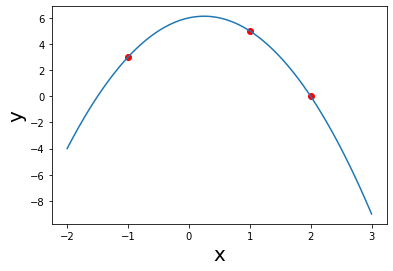

In [42]:
fig1,ax1 = plt.subplots()
x1 = np.linspace(-2,3,100)
ax1.plot(x1, horner(x[::-1],x1))
ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('y', fontsize=20)
ax1.scatter(np.array([-1,1,2]), np.array(y), color = 'red')

Dakle dobili smo jedinstvenu funkciju koja interpolira te tri točke.<br>
No, ovakav način računanja nije dovoljno efikasan te se u praksi koriste druge metode: Newtonova i Lagrangeova.

### Lagrangeov interpolacijski polinom
Neka su zadane točke $(x_i, y_i), i = 0, 1, . . . , n$. Definiramo polinome $\ell_i \in \mathcal{P}_n$ za $i = 0, 1, . . . , n$
$$\ell_i(x) = \prod_{{j=0},{j\neq i}}^{n} \frac {x - x_j}{x_i - x_j} = \frac {\omega_i(x)}{\omega_i(x_i)}$$ 
gdje je
$$\omega(x) = \prod_{i = 0}^{n} (x - x_i)$$
$$\omega_i(x) = \frac {\omega(x)}{x - x_i}$$
te očito za $\ell_i$ vrijedi $\ell_i(x) = \delta_{ij}$

pa interpolacijski polinom $\varphi$ možemo dobiti kao
$$\varphi(x) = \sum_{i = 0}^{n} y_i \ell_i(x)$$

In [80]:
def l(a,i,x):
    temp = [(x - a[j])/(a[i] - a[j]) for j in range(len(a)) if j != i]
    return np.prod(temp)

def lagrange(a,b,x):
    n = len(a)
    if (n != len(b)):
        print('Ulazni podaci nisu iste duljine!')
    rez = [b[i]*l(a,i,x) for i in range(n)]
    return sum(rez)

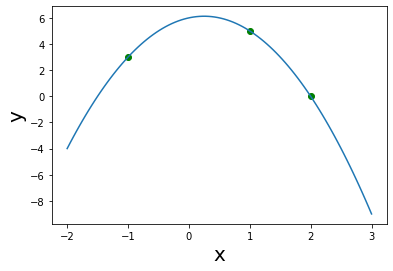

In [83]:
fig2,ax2 = plt.subplots()
x2 = np.linspace(-2,3,100)
ulaz_x = np.array([-1,1,2])
ulaz_y = np.array([3,5,0])
ax2.plot(x2, [lagrange(ulaz_x, ulaz_y, x2[i]) for i in range(len(x2))] )
ax2.set_xlabel('x', fontsize=20)
ax2.set_ylabel('y', fontsize=20)
ax2.scatter(np.array([-1,1,2]), np.array(y), color = 'g')

Naravno dobili smo istu funkciju interpolacije

Lagrangeov oblik pak nije pogodan za povečanje stupnja polinoma jer interpolacijski polinom
moramo računati od početka. Kod Newtonovog oblika to je jednostavno.
Neka su zadane točke $(x_i, y_i), i = 0, 1, . . . , n$. <b>Newtonov interpolacijski polinom</b> za zadane čvorove zadan je s:
$$\varphi(x) = f[x_0] + \sum_{i = 1}^{n}f[x_0,...,x_i](x - x_0)...(x - x_{i-1})$$

Brojeve $f[x_0,...,x_i]$ zovemo podijeljene razlike te vrijedi
$$f[x_i] = y_i$$
<br>
$$f[x_i,...,x_{i+k}]=\frac{f[x_{i+1},...,x_{i+k}] - f[x_i,...,x_{i+k-1}]}{x_{i+k} - x_i}$$

In [176]:
def pod_razlike(x,y):
    
    # x: np.lista elemenata apscise
    # y: np.lista elemenata ordinate
    n = len(x)
    if (n != len(y)):
        print('netocno zadane varijable')
        return

    x.astype(float)
    y.astype(float)
    x = np.copy(x)
    res = np.copy(y)
    for k in range(1,n):
        res[k:n] = (res[k:n] - res[k-1])/(x[k:n] - x[k-1])

    return res

def newton(a,G,x): 
    """G je pod_razlike(a,b), radi brzine se računa van funkcije"""
    n = len(a)
    res = G[n-1] 
    for i in range(n-2,-1,-1):
        res = res*(x - a[i]) + G[i]
        
    return res

In [177]:
"""provjera"""
G = pod_razlike(ulaz_x,ulaz_y)
print('Podjeljene razlike su ', G)
newton(ulaz_x, G, -1),newton(ulaz_x, G, 1),newton(ulaz_x, G, 2)

Podjeljene razlike su  [ 3  1 -2]


(3, 5, 0)

Interpolacijske funkcije koriste se pri aproksimaciji funkcija, kada jednu (složeniju) funkciju treba zamijeniti drugom (jednostavnijom). Sada ću na primjeru eksponencijalne funkcije $f(x) = e^x$ pokazati kako se aproksimacija "približava" pravoj funkciji što joj dajemo veći broj interpolacijskih točaka na intervalu $[-3,3]$.

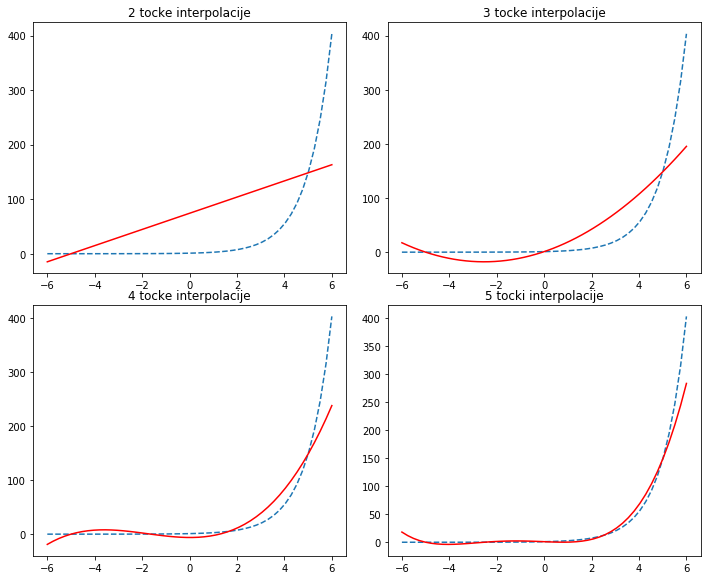

In [184]:
x1 = np.linspace(-5,5,2)
y1 = np.exp(x1)
G1 = pod_razlike(x1,y1)
x2 = np.linspace(-5,5,3)
y2 = np.exp(x2)
G2 = pod_razlike(x2,y2)
x3 = np.linspace(-5,5,4)
y3 = np.exp(x3)
G3= pod_razlike(x3,y3)
x4 = np.linspace(-5,5,5)
y4 = np.exp(x4)
G4 = pod_razlike(x4,y4)

fig, ((a1,a2), 
       (a3,a4)) = plt.subplots(2, 2, figsize=(10,8))
fig.tight_layout()
x = np.linspace(-6,6)
a1.plot(x, np.exp(x), linestyle='--')
a2.plot(x, np.exp(x), linestyle='--')
a3.plot(x, np.exp(x), linestyle='--')
a4.plot(x, np.exp(x), linestyle='--')

a1.set_title('2 tocke interpolacije')
a2.set_title('3 tocke interpolacije')
a3.set_title('4 tocke interpolacije')
a4.set_title('5 tocki interpolacije')

a1.plot(x,np.array([newton(x1, G1, i) for i in x]), color='r' )
a2.plot(x,np.array([newton(x2, G2, i) for i in x]), color='r' )
a3.plot(x,np.array([newton(x3, G3, i) for i in x]), color='r' )
a4.plot(x,np.array([newton(x4, G4, i) for i in x]), color='r' )


### Linearna regresija i metoda najmanjih kvadrata

Ponovno, neka je funkcija $f$ zadana na diskretnom skupu točaka $x_0, . . ., x_n$.
Takoder, pretpostavljamo da je tih točaka mnogo više nego nepoznatih parametara aproksimacione funkcije. Aproksimaciona funkcija 
$$\phi(x;a_0,...,a_m)$$ 
određuje se iz uvjeta da je 2-norma vektora pogrešaka u čvorovima aproksimacije
najmanja moguća, tj. tako da minimiziramo
$$ S = \sum_{k=0}^{n}(f(x_k) − \phi(x_k))^2 \longrightarrow min$$
<br>
Promatrat ću samo najjednostavniji slučaj, kada aproksimiramo <b>linearnom funkcijom</b>, tj. 

$$\phi(x)= Y = c + mX$$

$X,Y$ su polja dimenzije n


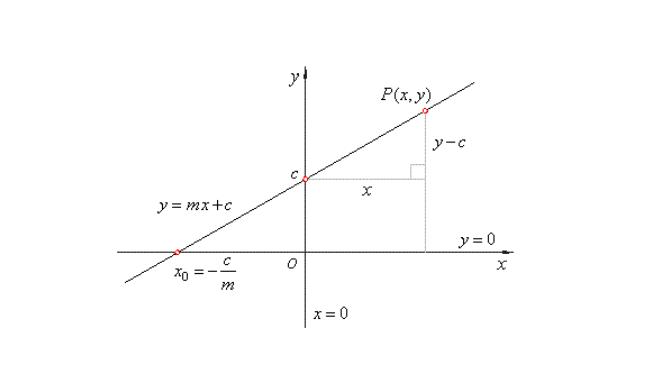

In [185]:
from IPython.display import Image
Image(filename='lin_reg.png')

Ovakva metoda vrlo je primnjenjiva u statistici.
Rješavanjem ovog problema dobiva se slijedeći sustav:
$$m = \frac{\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^{n}(x_i - \overline{x})^2}$$<br>
$$c = \overline{y} - m\overline{x}$$<br>

In [187]:
def coef(X,Y):
    _x = np.mean(X)
    _y = np.mean(Y)
    gornja = donja = 0
    for i in range(len(X)):
        gornja += (X[i] - _x)*(Y[i] - _y)
        donja += (X[i] - _x)**2
    m = gornja/donja
    c = _y - m*_x
    return np.array([m,c])

#### Uploadat ću tablicu data.csv (koju sam našao na internetu) koja sadrži veliki broj dvodimenzionalnih točaka iz koje ću učitati podatke te izračunati primadni regresijski pravac.

In [206]:
data=pd.read_csv('data.csv')
data.head()

,x,y
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


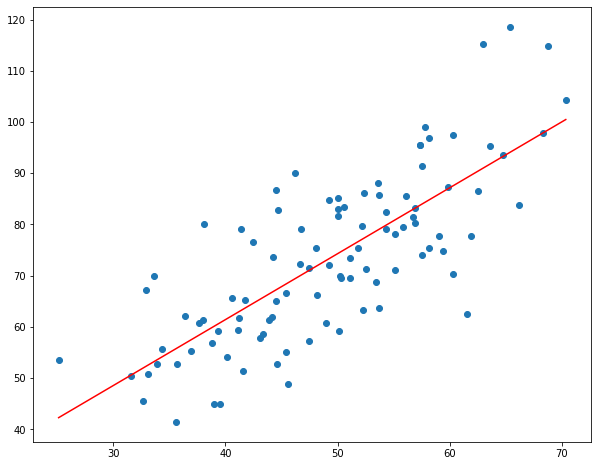

In [207]:
X = np.array(data['x'])
Y = np.array(data['y'])
t = coef(X,Y)
pocetak = min(X)
kraj = max(X)
arr = np.linspace(pocetak, kraj)

fig5,ax5 = plt.subplots(figsize=(10,8))
plt.scatter(X,Y)
plt.plot(arr, [arr[i]*t[0] + t[1] for i in range(len(arr))], color ='r')
plt.show()